## Cross play matrix for each architecture

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ff = pd.read_csv('sample/xp_ff.csv')
ff = ff.iloc[:,1:].values
idx = np.argsort(ff[:,0])
ff = ff[idx][:,idx]

att3 = pd.read_csv('sample/xp_att3.csv')
att3 = att3.iloc[:15,1:16].values
idx = np.argsort(att3[:,0])
att3 = att3[idx][:,idx]

In [2]:
def get_table_scores(mat):
    sp_score_mean, sp_score_std = np.mean(np.diag(mat)), np.sqrt(np.var(np.diag(mat)))
    off_diag = np.where(~np.eye(mat.shape[0],dtype=bool))
    xp_score_mean, xp_score_std = np.mean(mat[off_diag]), np.sqrt(np.var(mat[off_diag]))
    return sp_score_mean, sp_score_std, xp_score_mean, xp_score_std

print("Feed forward: ")
print(get_table_scores(ff))
print("Att3: ")
print(get_table_scores(att3))
print("Att3 cluster 1: ")
print(get_table_scores(att3[:2,:2]))
print("Att3 cluster 2: ")
print(get_table_scores(att3[2:,2:]))

Feed forward: 
(0.8978666623433431, 0.03371620313471019, 0.28765714328203884, 0.11413490906803639)
Att3: 
(0.9109333316485088, 0.12612346888096473, 0.4999428577499375, 0.47872409467973825)
Att3 cluster 1: 
(0.7280000150203705, 0.007999986410140991, 0.75, 0.0059999823570251465)
Att3 cluster 2: 
(0.9390769188220685, 0.11137357279455212, 0.6071538463658772, 0.4781891074116915)


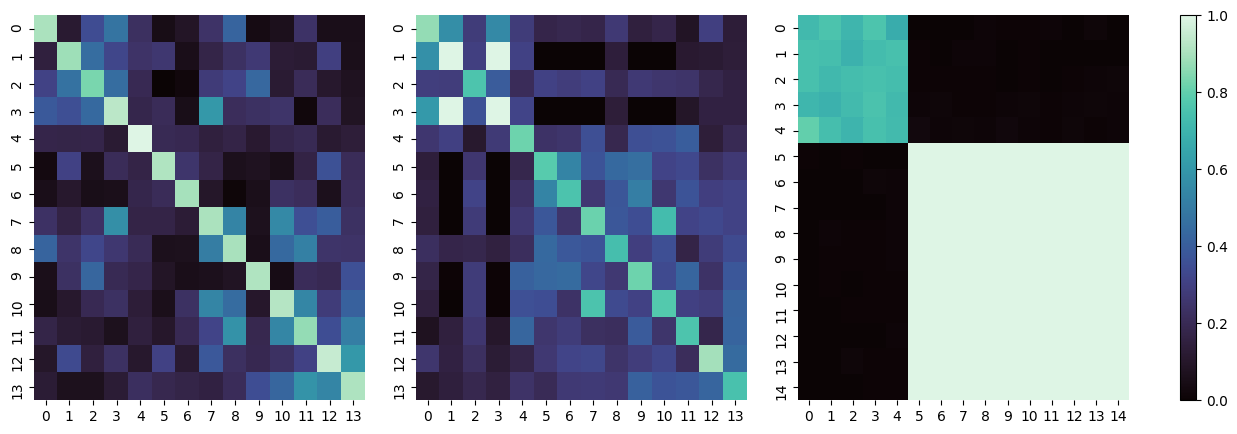

In [3]:
att1 = pd.read_csv('sample/xp_att1.csv')
att1 = att1.iloc[:15,1:16].values
idx = np.argsort(att1[:,0])
att1 = att1[idx][:,idx]

att2 = pd.read_csv('sample/xp_att2.csv')
att2 = att2.iloc[:15,1:16].values
idx = np.argsort(att2[:,0])
att2 = att2[idx][:,idx]

fig, axs = plt.subplots(ncols=4, gridspec_kw=dict(width_ratios=[4,4,4,0.2]), figsize=(15,5))

sns.heatmap(att1, cbar=False, ax=axs[0], cmap="mako")
sns.heatmap(att2, cbar=False, ax=axs[1], cmap="mako")
sns.heatmap(att3, cbar=False, ax=axs[2], cmap="mako")

fig.colorbar(axs[2].collections[0], cax=axs[3])

plt.show()

In [4]:
print("Att1: ")
print(get_table_scores(att1))
print("Att2: ")
print(get_table_scores(att2))
print("Att3: ")
print(get_table_scores(att3))

Att1: 
(0.9168571404048375, 0.03357476973328881, 0.28683516424108335, 0.13426546118933083)
Att2: 
(0.8239999966961997, 0.08402720672327453, 0.263208791278405, 0.16249561332303258)
Att3: 
(0.9109333316485088, 0.12612346888096473, 0.4999428577499375, 0.47872409467973825)


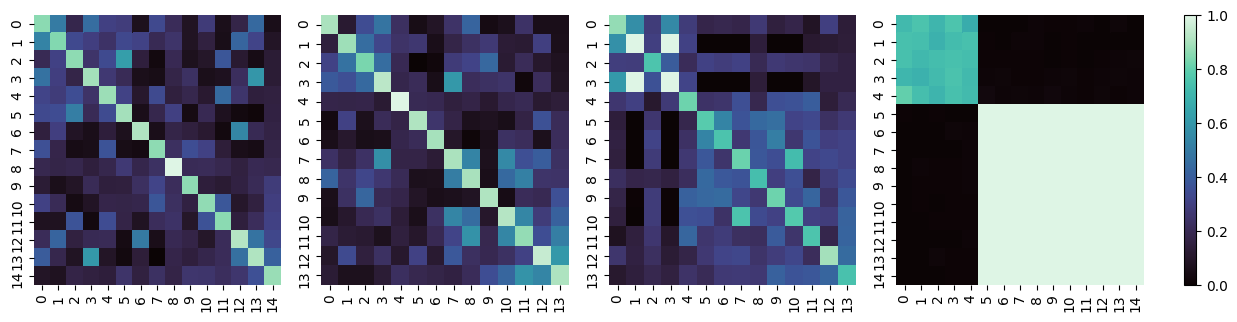

In [5]:
fig, axs = plt.subplots(ncols=5, gridspec_kw=dict(width_ratios=[4,4,4,4,0.2]), figsize=(15,3.5))

sns.heatmap(ff, cbar=False, ax=axs[0], cmap="mako")
sns.heatmap(att1, cbar=False, ax=axs[1], cmap="mako")
sns.heatmap(att2, cbar=False, ax=axs[2], cmap="mako")
sns.heatmap(att3, cbar=False, ax=axs[3], cmap="mako")

fig.colorbar(axs[2].collections[0], cax=axs[4])

plt.show()

## Teaching

In [9]:
import pickle

filename = '/Users/liujizhou/Desktop/ReinforcementLearning/some work/hintplaygame/res/teach/FF_hand_5_l1_3_l2_3_Att3_hand_5_l1_3_l2_3/2021-09-24 09:20:50.353502_1.pkl'
def plot(filename, label):
    with open(filename, "rb") as f:
        res = pickle.load(f)
    rewards = res['rewards']
    rewards = np.array(rewards)
    rewards = rewards.reshape(500,-1)
    moving_avg = np.mean(rewards, axis=1)
    plt.plot(moving_avg, label=label)

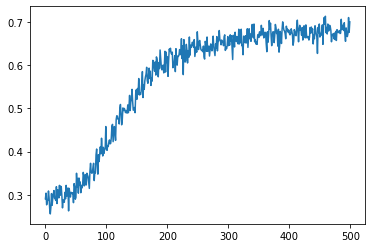

In [97]:
plot(filename, None)

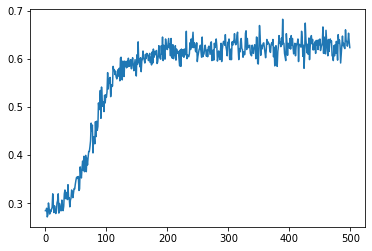

In [98]:
filename2 = '/Users/liujizhou/Desktop/ReinforcementLearning/some work/hintplaygame/res/teach/FF_hand_5_l1_3_l2_3_FF_hand_5_l1_3_l2_3/2021-09-24 09:03:47.444878_1.pkl'
plot(filename2,None)

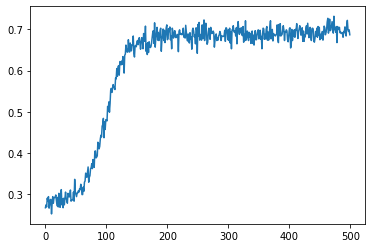

In [99]:
filename3 = '/Users/liujizhou/Desktop/ReinforcementLearning/some work/hintplaygame/res/teach/Att3_hand_5_l1_3_l2_3_Att3_hand_5_l1_3_l2_3/2021-09-24 09:36:50.608390_1.pkl'
plot(filename3, None)

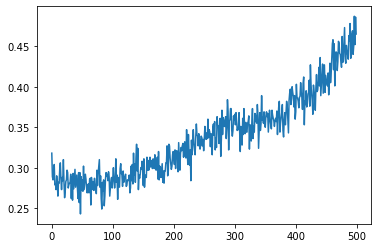

In [100]:
filename4 = '/Users/liujizhou/Desktop/ReinforcementLearning/some work/hintplaygame/res/teach/Att3_hand_5_l1_3_l2_3_FF_hand_5_l1_3_l2_3/2021-09-24 09:19:42.873738_1.pkl'
plot(filename4, None)

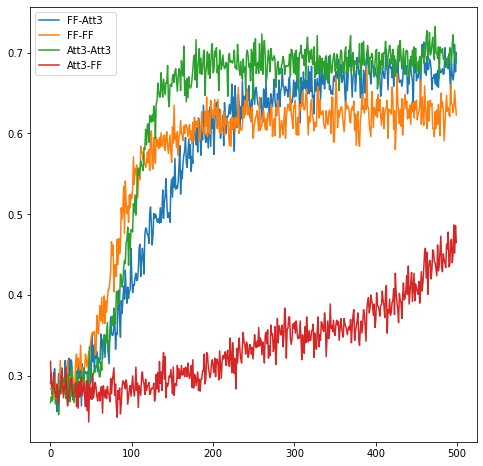

In [101]:
fig = plt.figure(figsize=(8,8))

plot(filename, 'FF-Att3')
plot(filename2, 'FF-FF')
plot(filename3, 'Att3-Att3')
plot(filename4, 'Att3-FF')
plt.legend()
plt.show()

In [11]:
import glob
import os
import pickle


def plot_avg(agent_path, label):
    moving_avgs = []
    for filename in glob.glob(os.path.join(agent_path, "*.pkl")):
        with open(filename, "rb") as f:
            res = pickle.load(f)
        rewards = res['rewards']
        rewards = np.array(rewards)
        rewards = rewards.reshape(3000,-1)
        moving_avg = np.mean(rewards, axis=1)
        moving_avgs.append(moving_avg)
    moving_avgs = np.array(moving_avgs)
    moving_avg_avg = np.mean(moving_avgs, axis=0)
    plt.plot(moving_avg_avg, label=label)

path1 = 'res/Att1_hs_5_l1_3_l2_3_TrueTrue3000000'
path2 = 'res/Att2_hs_5_l1_3_l2_3_TrueTrue3000000'
path3 = 'res/LSTM_hs_5_l1_3_l2_3_TrueTrue3000000'
path4 = 'res/FF_hs_5_l1_3_l2_3_TrueTrue3000000'
path5 = 'res/Att3_hs_5_l1_3_l2_3_TrueTrue3000000'



# fig = plt.figure(figsize=(8,8))

# plot_avg(path1, 'FF-Att3')
# plot_avg(path2, 'FF-FF')
# plot_avg(path3, 'Att3-Att3')
# plot_avg(path4, 'Att3-FF')

# plt.legend()
# plt.show()

shit
shit
shit
shit
shit


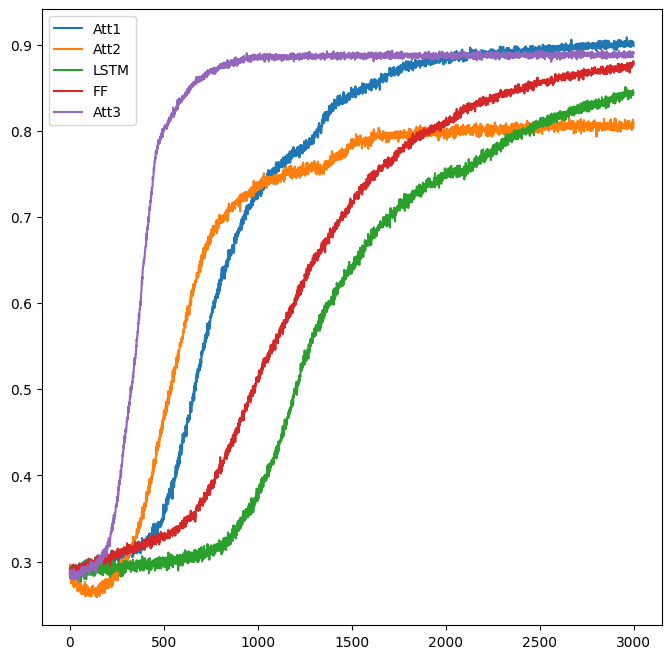

In [12]:
import glob
import os
import pickle

fig = plt.figure(figsize=(8,8))

path1 = 'res/Att1_hs_5_l1_3_l2_3_TrueTrue3000000'
path2 = 'res/Att2_hs_5_l1_3_l2_3_TrueTrue3000000'
path3 = 'res/LSTM_hs_5_l1_3_l2_3_TrueTrue3000000'
path4 = 'res/FF_hs_5_l1_3_l2_3_TrueTrue3000000'
path5 = 'res/Att3_hs_5_l1_3_l2_3_TrueTrue3000000'

plot_avg(path1, 'Att1')
print('shit')
plot_avg(path2, 'Att2')
print('shit')
plot_avg(path3, 'LSTM')
print('shit')
plot_avg(path4, 'FF')
print('shit')
plot_avg(path5, 'Att3')
print('shit')


plt.legend()
plt.show()